Overview of HTTP

When you, the **client**, access a web page your browser sends an **HTTP** request to the **web server** that hosts the page. If no specific file is mentioned in the URL, the server typically looks for a default file, such as "<code>index.html</code>". If your request is successful, the server will send the object to the client in an **HTTP response**. This includes information like the type of the **resource**, the length of the **resource**, and other information.

<p>
The figure below represents the process. The circle on the left represents the client, the circle on the right represents the Web server. The table under the Web server represents a list of resources stored in the web server. In  this case an <code>HTML</code> file, <code>png</code> image, and <code>txt</code> file .
</p>
<p>
The <b>HTTP</b> protocol allows you to send and receive information through the web including webpages, images, and other web resources.


The following code snippets and topic provide an overview of the Requests library for interacting with the HTTP protocol.


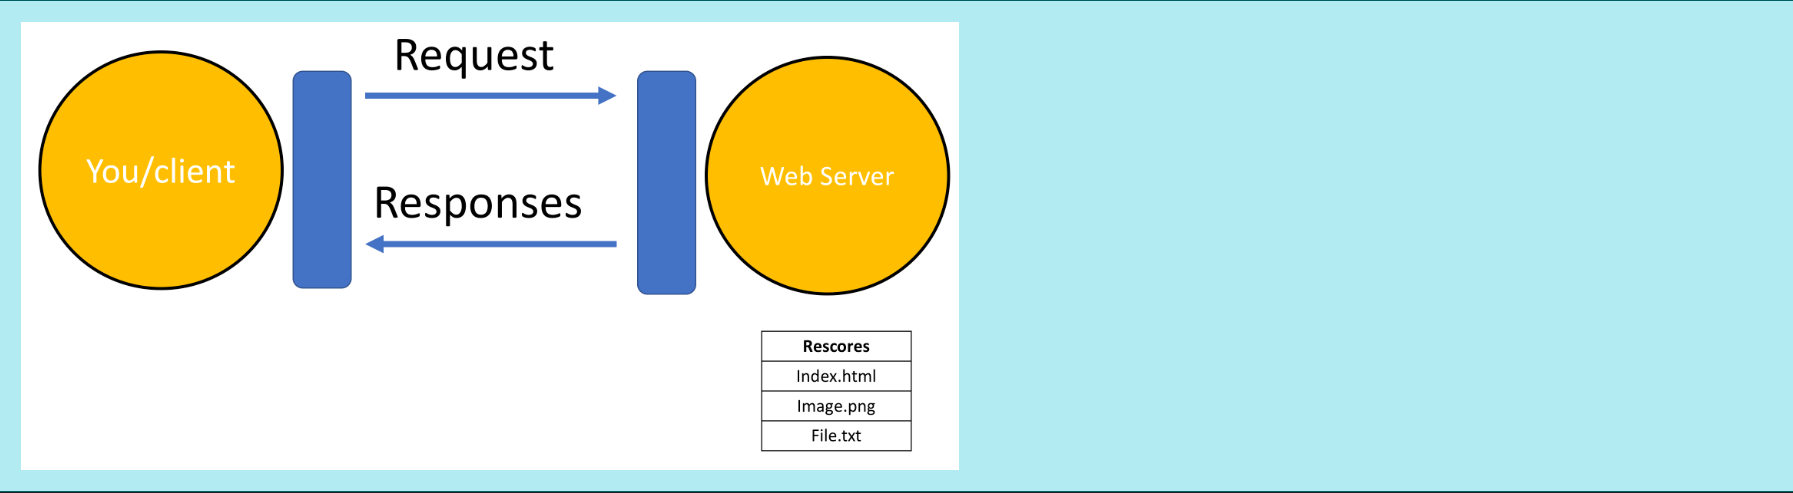



---
Uniform Resource Locator:URL

it's the most popular way to find resources on the web. The URL can break into three parts

* Scheme:- This is the protocol, for this codes it will be `http://`

* Internet address or Base URL:- This will be used to find the location for example: `www.gitlab.com`

* Route:- Location on the web server for example: `/images/IDNlogo.png`




---
Request

the process can be broken into the Request and Response process. The request using the `get method`

GET method is an HTTP method. Also the location of the resource /index.html and the HTTP version. The Request header passes additional information with an HTTP request






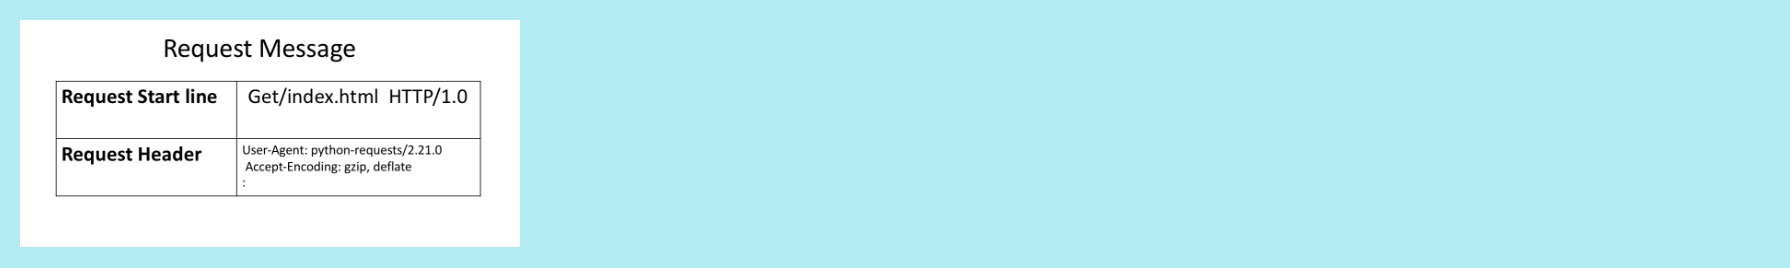

When an HTTP request is made, an HTTP method is sent, this tells the server what action to perform. A list of several HTTP methods is shown below

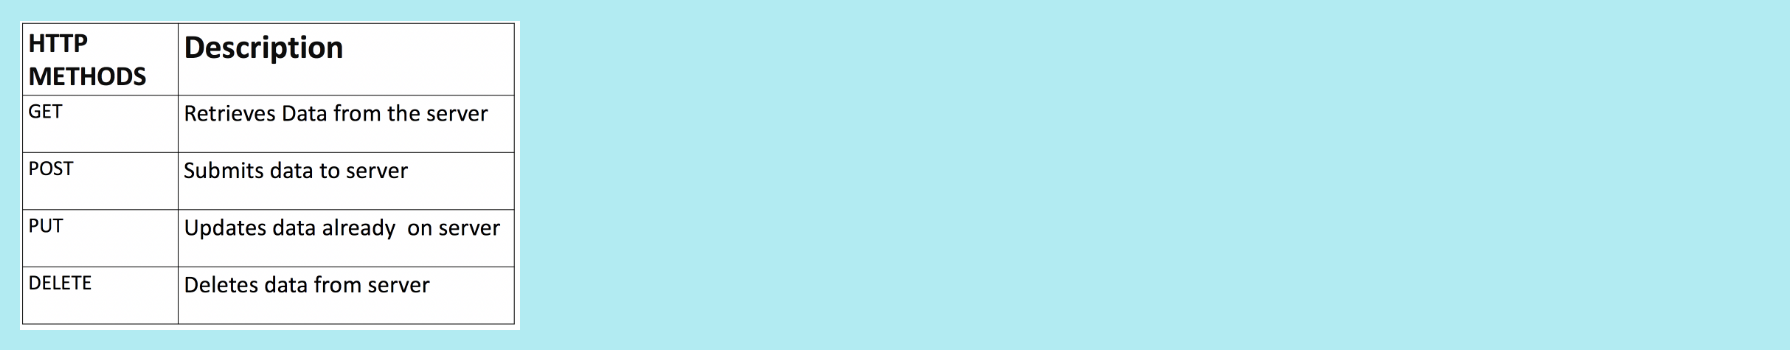





---
Response

The figure below represents the response; the response start line contains the version number <code>HTTP/1.0</code>, a status code (200) meaning success, followed by a descriptive phrase (OK). The response header contains useful information. Finally, we have the response body containing the requested file, an <code> HTML</code> document.  It should be noted that some requests have headers.

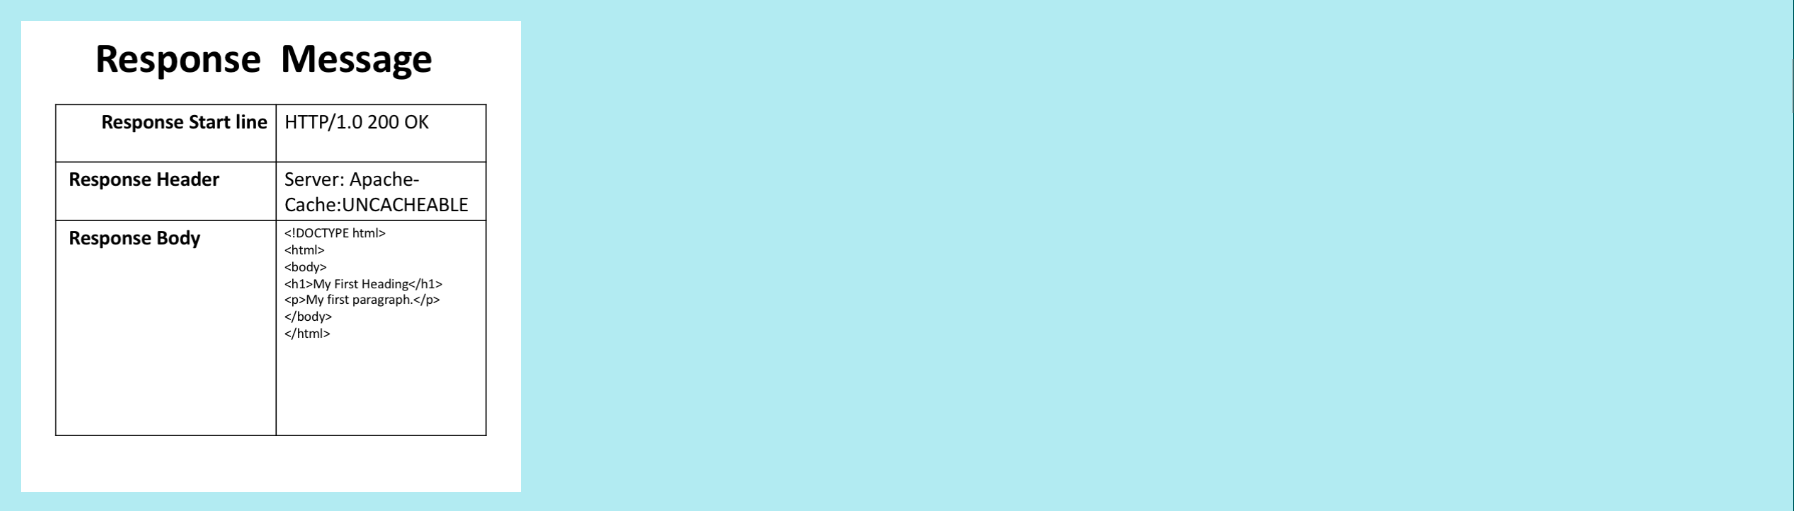




---
Some status code examples are shown in the table below, the prefix indicates the class. These are shown in yellow, with actual status codes shown in  white.

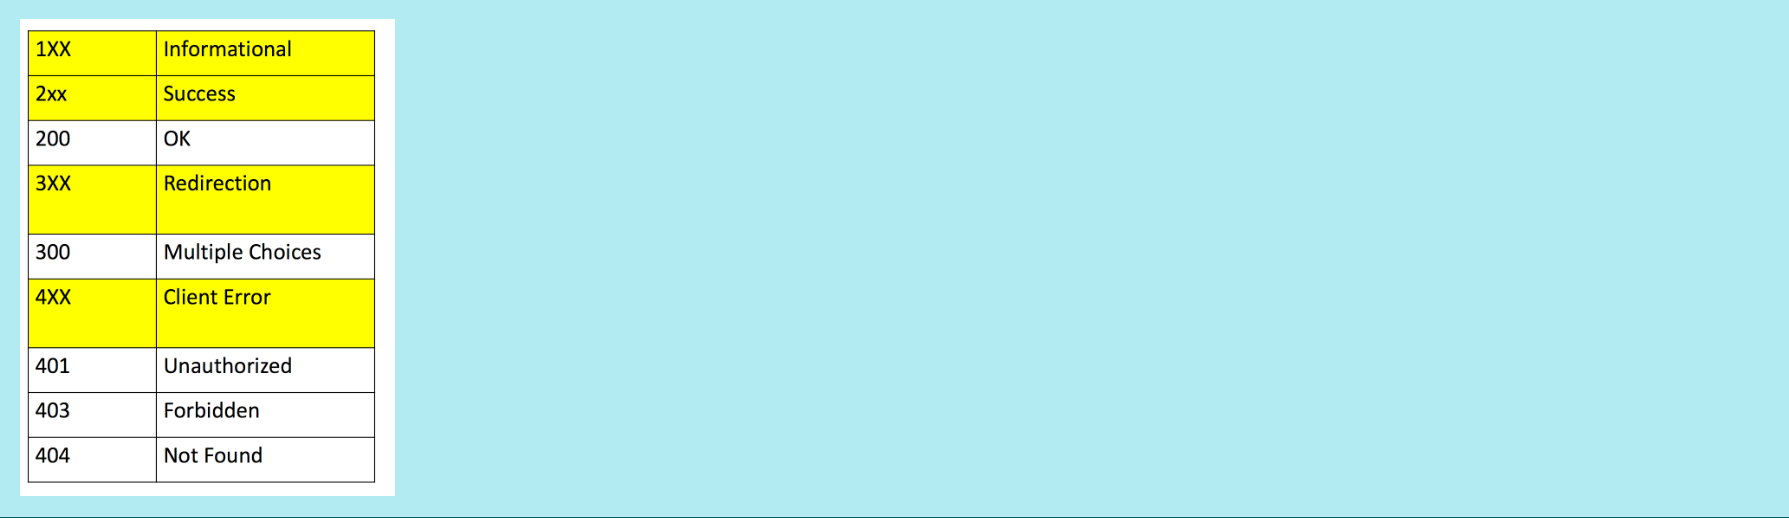








---

Requests in Python

`Requests` is a Python Library that allows to send `HTTP/1.1` requests easily.

In [5]:
# import requests library
import requests

make a `GET request` via the method get to www.nasa.gov:

In [6]:
url = 'https://www.nasa.gov/'
r = requests.get(url)

I have the response object r, this has information about the request, like `status of the request `

In [7]:
r.status_code

200

To view the `request headers`

In [8]:
r.request.headers

{'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate, zstd', 'Accept': '*/*', 'Connection': 'keep-alive'}

To view the `request body`, in the following line, as there is no body for a get request i get a ` None`

In [9]:
print(r.request.body)

None


View the `HTTP response header` using the attribute `headers`. This return a python dictionary of HTTP response headers

In [10]:
header = r.headers
print(header)

{'Server': 'nginx', 'Date': 'Tue, 01 Jul 2025 14:15:53 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Host-Header': 'a9130478a60e5f9135f765b23f26593b', 'X-launch-status': 'Go Flight!', 'X-Frame-Options': 'SAMEORIGIN', 'Link': '<https://www.nasa.gov/wp-json/>; rel="https://api.w.org/", <https://www.nasa.gov/wp-json/wp/v2/pages/128943>; rel="alternate"; title="JSON"; type="application/json", <https://www.nasa.gov/>; rel=shortlink', 'Content-Encoding': 'gzip', 'cache-control': 'max-age=300, must-revalidate', 'x-rq': 'bur7 0 40 9980', 'accept-ranges': 'bytes', 'x-cache': 'HIT', 'Strict-Transport-Security': 'max-age=31536000;includeSubdomains;preload'}


I can obtain the `date the request was sent` using the `key Date`

In [11]:
header['Date']

'Tue, 01 Jul 2025 14:15:53 GMT'

`Content-Type` indicates the type of data

In [12]:
header['Content-Type']

'text/html; charset=UTF-8'

Check the `encoding`

In [13]:
r.encoding

'UTF-8'

As the Content-Type is text/html i can use the attribute `text` to display the HTML in the body, i can review the first 100 characters

In [14]:
r.text[:100]

'<!doctype html>\n<html lang="en-US" prefix="og: https://ogp.me/ns#">\n<head>\n\t<meta charset="UTF-8">\n<'

I can load other types of data for non-text requests, like images

In [23]:
url = 'https://www.nasa.gov/wp-content/uploads/2025/06/nasaplus-coming-to-netflix.jpg?resize=2000,1125'


In [24]:
# get request
r=requests.get(url)

Response header

In [25]:
print(r.headers)

{'Server': 'nginx', 'Date': 'Tue, 01 Jul 2025 14:20:30 GMT', 'Content-Type': 'image/jpeg', 'Content-Length': '218661', 'Connection': 'keep-alive', 'Last-Modified': 'Tue, 01 Jul 2025 14:20:30 GMT', 'ETag': '"b9d4093cdf20ec05"', 'Vary': 'Accept', 'Access-Control-Allow-Methods': 'GET, HEAD', 'Access-Control-Allow-Origin': '*', 'cache-control': 'max-age=31536000', 'accept-ranges': 'bytes, bytes', 'x-cache': 'MISS', 'x-rq': 'bur7', 'Strict-Transport-Security': 'max-age=31536000;includeSubdomains;preload'}


To see the 'Content-Type'`

In [26]:
r.headers['Content-Type']

'image/jpeg'

An image is a response object that contains the images as a bytes-like object. As a result, i must save it using a file object. First, I specify the file path and name

In [27]:
import os
path = os.path.join(os.getcwd(),'image.png')

I save the file, in order to access the body of the response i can use the attribute `content` then save it using the `open` function and write `methode`

In [28]:
with open(path,'wb') as f:
  f.write(r.content)

I can view the image

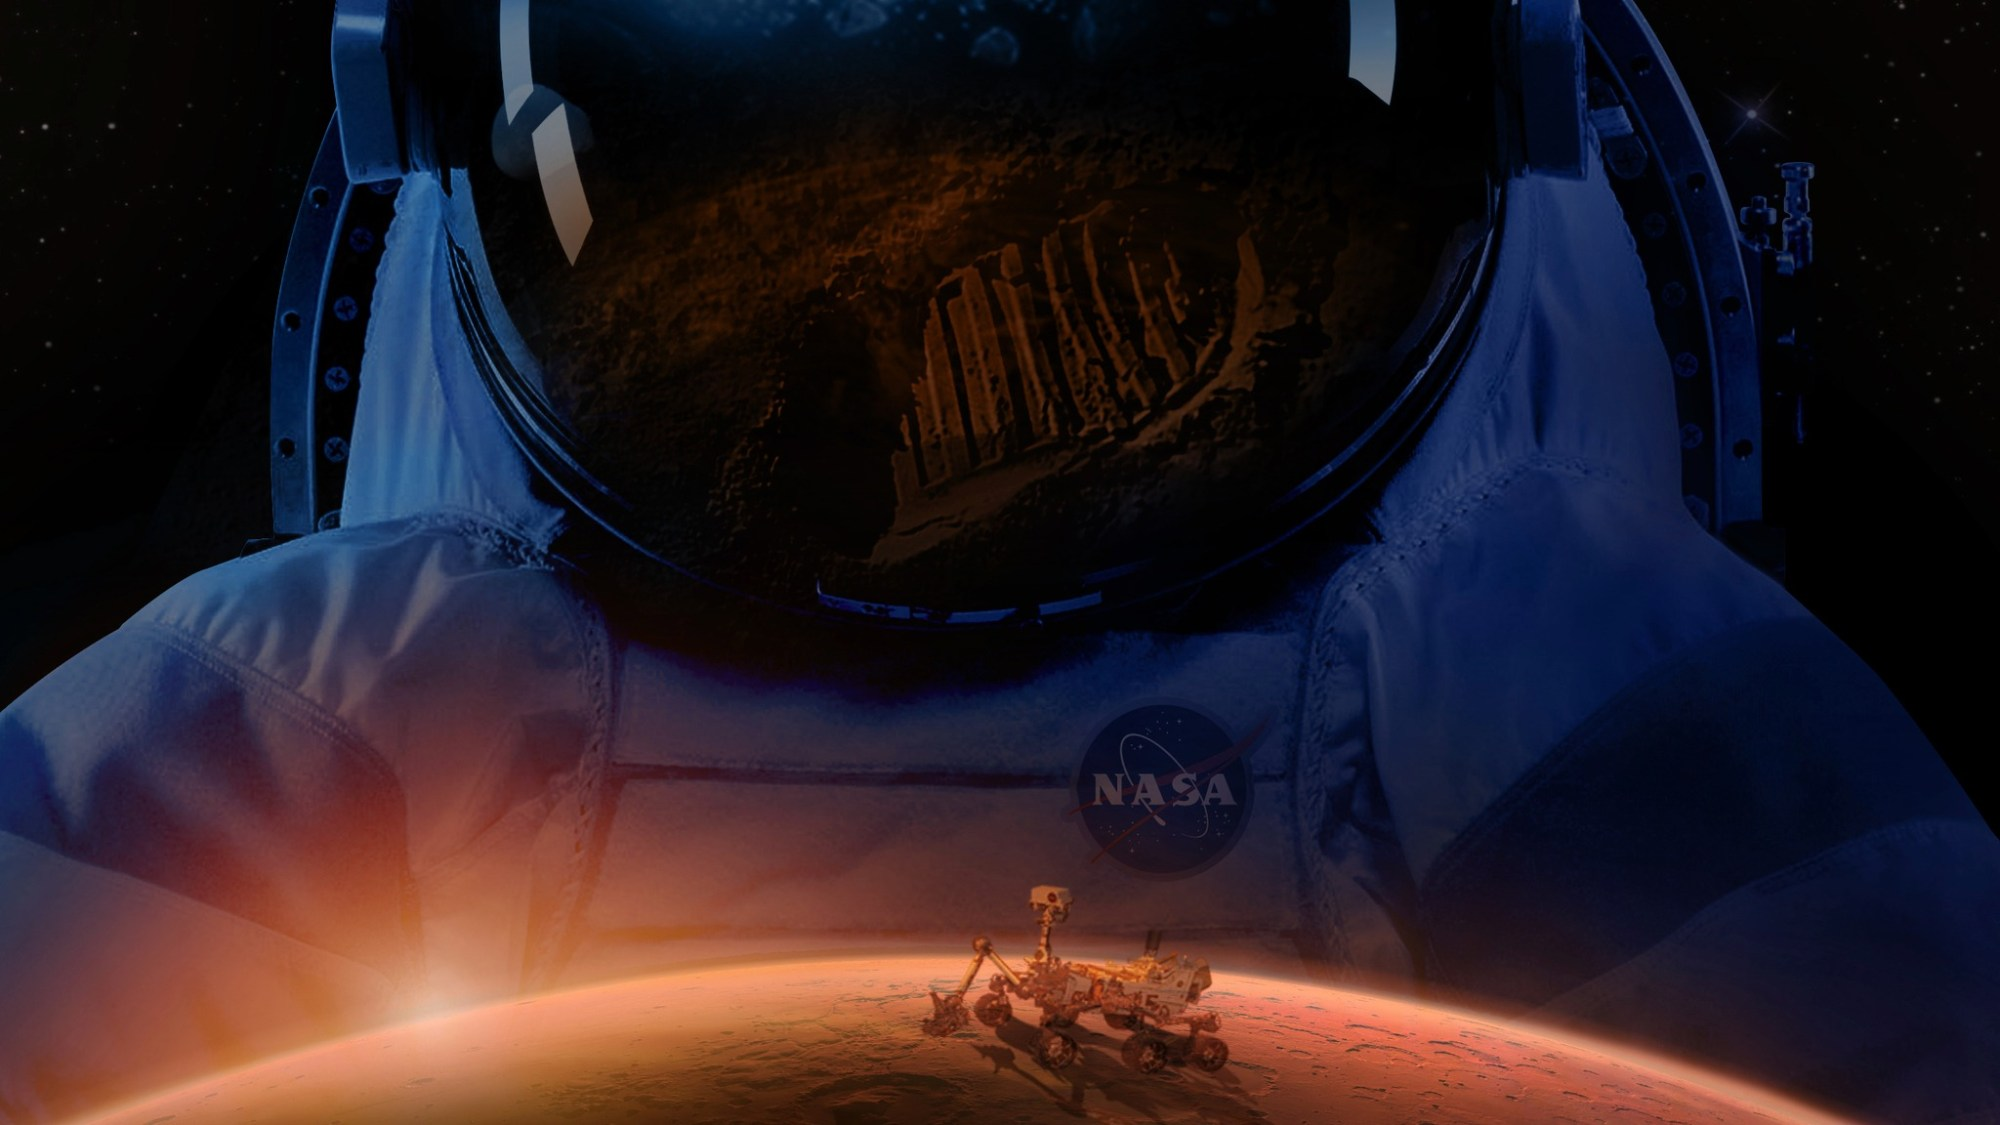

In [29]:
from PIL import Image
Image.open(path)